In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [2]:
PATH    = "aorta"
CSV     = "/media/marsdenlab/Data1/UQ/0110/csv/"+PATH+".csv"
FIG_DIR = "/media/marsdenlab/Data1/UQ/0110/figures"

df = pd.read_csv(CSV)
df['vWSS_magnitude_boundary'] = np.sqrt(df['vWSS_00400_0_boundary']**2 +\
df['vWSS_00400_1_boundary']**2 +\
df['vWSS_00400_2_boundary']**2)

print(df.columns)

Index(['Unnamed: 0', 'area', 'generation', 'length', 'mesh', 'model', 'nx',
       'ny', 'nz', 'point', 'pressure_00400_0', 'pressure_00400_0_boundary',
       'radius_actual', 'radius_supplied', 'vWSS_00400_0',
       'vWSS_00400_0_boundary', 'vWSS_00400_1', 'vWSS_00400_1_boundary',
       'vWSS_00400_2', 'vWSS_00400_2_boundary', 'velocity_00400_0',
       'velocity_00400_0_boundary', 'velocity_00400_1',
       'velocity_00400_1_boundary', 'velocity_00400_2',
       'velocity_00400_2_boundary', 'x', 'y', 'z'],
      dtype='object')


In [3]:
generations = [1,2,3,4]
meshes = ['coarse','medium','fine']
label  = 'area'
label_plot = label.replace('_',' ')
arrays = []
for g in generations:
    for m in meshes:
        data = df.loc[(df['mesh']==m) & (df['generation']==g)]
        
        models = list(data['model'].unique())
        x = list(data['point'].unique())
        
        Nx = len(x)
        Nm = len(models)
        Y  = np.zeros((Nm,Nx))
        for i,m in enumerate(models):
            y    = data.loc[data['model']==m][label].values
            Y[i] = y
        
        arrays.append( (g,m,models,x,Y) )

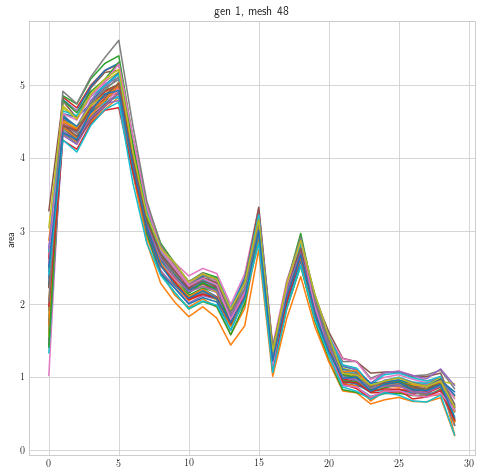

In [4]:
g,m,models,x,Y = arrays[0]

plt.figure(figsize=(8,8))
plt.title('gen ' + str(g) +', N mesh '+str(m))
plt.plot(Y.T, label=label_plot)
plt.ylabel(label_plot)
plt.show()

[1.05262518 0.33392734 0.32646248 0.32496823 0.34934433 0.37382427
 0.32017995 0.27974023 0.25872074 0.25256939 0.23976987 0.2490433
 0.25902394 0.22740527 0.25708857 0.2356772  0.20796919 0.22355076
 0.24978202 0.21918777 0.20254755 0.20855956 0.2109464  0.16455002
 0.16763293 0.17417565 0.1740795  0.16600836 0.17559101 0.3477383 ]


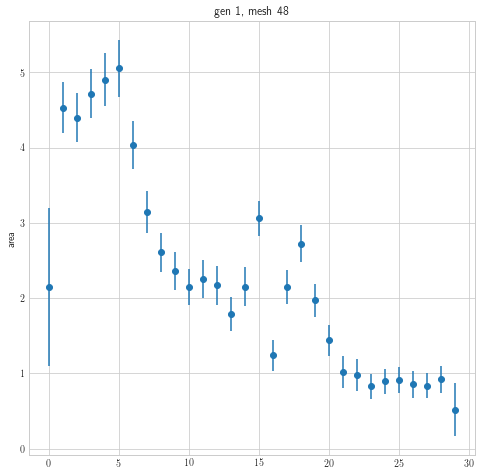

In [5]:
mu  = np.mean(Y,axis=0)
#sig = np.amax(Y,axis=0)-np.amin(Y,axis=0) 
sig = np.std(Y,axis=0)*2
print(sig)
plt.figure(figsize=(8,8))
plt.title('gen ' + str(g) +', N mesh '+str(m))
plt.errorbar(x,y=mu, yerr=sig, fmt='o')
plt.ylabel(label_plot)
plt.show()

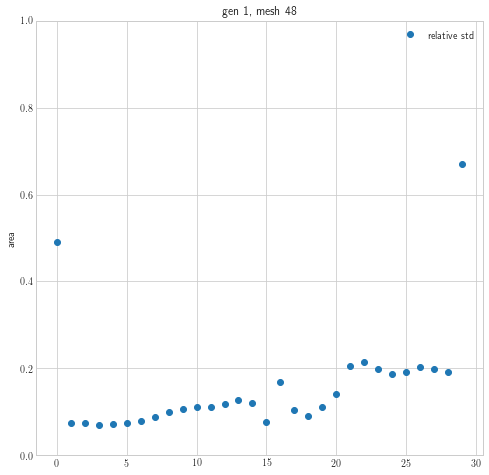

In [6]:
s = sig/np.abs(mu)
plt.figure(figsize=(8,8))
plt.title('gen ' + str(g) +', N mesh '+str(m))
plt.plot(s, linestyle='',marker='o', label='relative std')
plt.ylabel(label_plot)
plt.legend()
plt.ylim(0,1)
plt.show()